In [150]:
import pandas as pd 
import numpy as num 
import matplotlib.pyplot as mat 
import seaborn as sea 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [121]:
df = pd.read_csv('C:/Users/mohieldine/Desktop/Python Tutorial/Telecom Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [161]:
#Data_Cleaning
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [162]:
#To remove customerID column 
df.drop(columns='customerID',inplace = True)

In [163]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [164]:
duplicate_columns = df.columns[df.apply(lambda x: x.duplicated()).any()]

print("Columns with duplicate values:", duplicate_columns)

Columns with duplicate values: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [165]:
df.shape

(7043, 20)

In [166]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [167]:
# to convert the data type of total charges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

In [302]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [169]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [170]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [171]:
# To show the unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}:')
    print(unique_values)
    print()

Unique values in gender:
['Female' 'Male']

Unique values in SeniorCitizen:
[0 1]

Unique values in Partner:
['Yes' 'No']

Unique values in Dependents:
['No' 'Yes']

Unique values in tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values in PhoneService:
['No' 'Yes']

Unique values in MultipleLines:
['No phone service' 'No' 'Yes']

Unique values in InternetService:
['DSL' 'Fiber optic' 'No']

Unique values in OnlineSecurity:
['No' 'Yes' 'No internet service']

Unique values in OnlineBackup:
['Yes' 'No' 'No internet service']

Unique values in DeviceProtection:
['No' 'Yes' 'No internet service']

Unique values in TechSupport:
['No' 'Yes' 'No internet service']

Unique values in StreamingTV:
['No' 'Yes' 'No internet service']

Unique values in StreamingMovies:
['No' 'Yes' 'No internet service']

Uni

In [172]:
#Descriptive_Statistics 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


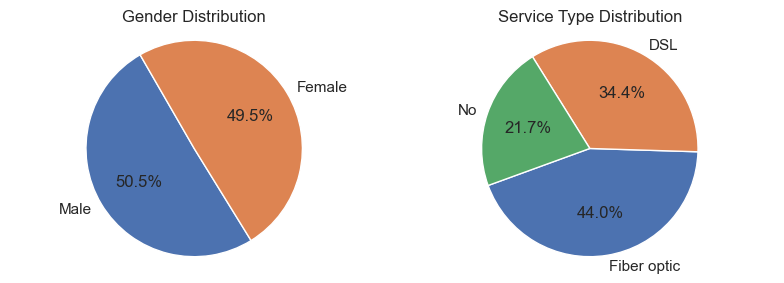

In [173]:
#Exploratory_Data_Analysis


#pie chart to represent the contriution of the gender and geography
data_gender = df['gender'].value_counts()
labels_gender = data_gender.index

data_geography = df['InternetService'].value_counts()
labels_geography = data_geography.index

fig, axes = mat.subplots(1, 2, figsize=(8, 3))

axes[0].pie(data_gender, labels=labels_gender, autopct='%1.1f%%', startangle=120)
axes[0].set_title("Gender Distribution")

axes[1].pie(data_geography, labels=labels_geography, autopct='%1.1f%%', startangle=200)
axes[1].set_title("Service Type Distribution")

for ax in axes:
    ax.axis('equal')

mat.tight_layout()
mat.show()


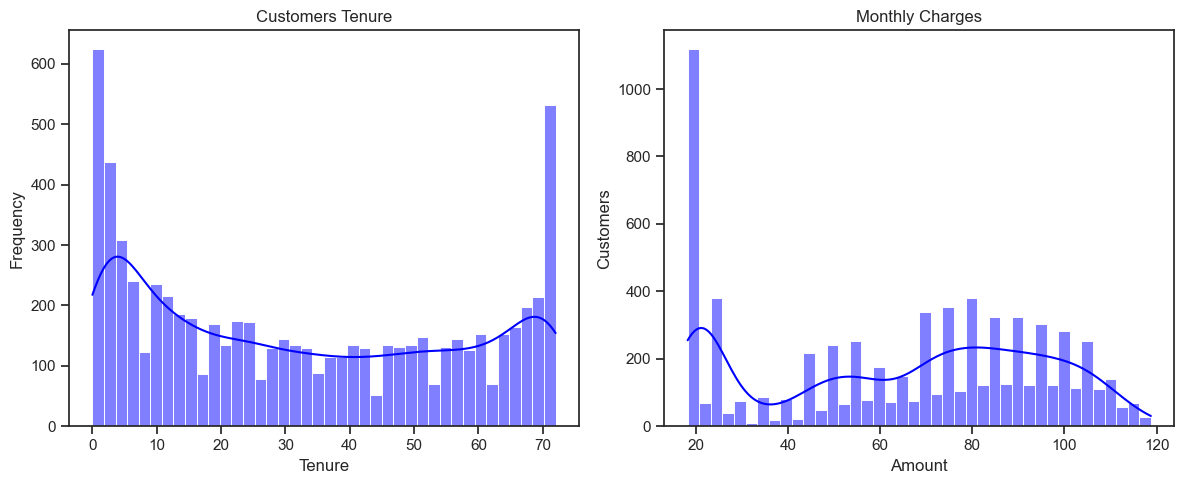

In [174]:

# Create a figure with two subplots
fig, axes = mat.subplots(1, 2, figsize=(12, 5))

# First subplot: Histogram for 'Tenure'
sea.histplot(data=df, x='tenure', bins=40, kde=True, color='blue', ax=axes[0])

# Set labels and title for the first subplot
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Customers Tenure')

# Second subplot: Histogram for 'MonthlyCharges'
sea.histplot(data=df, x='MonthlyCharges', bins=40, kde=True, color='blue', ax=axes[1])

# Set labels and title for the second subplot
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Customers')
axes[1].set_title('Monthly Charges')

# Adjust spacing between subplots
mat.tight_layout()

# Show the combined plot
mat.show()


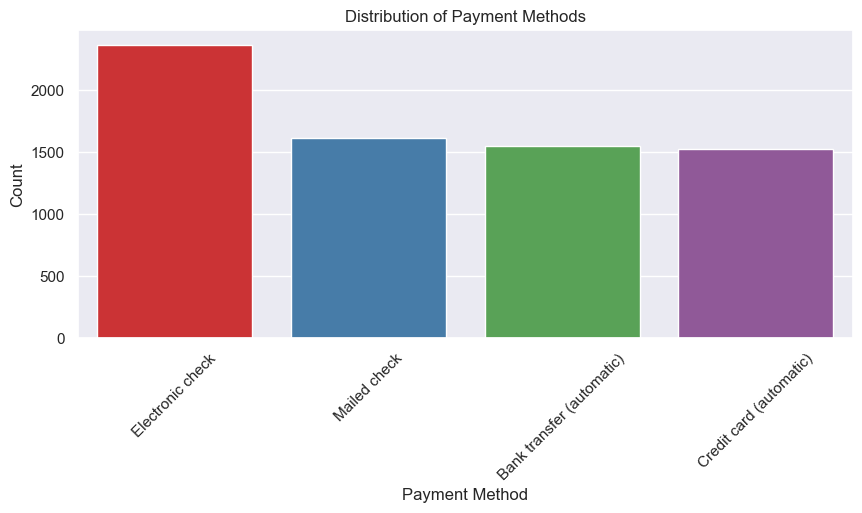

In [175]:
sea.set(style="darkgrid")
mat.figure(figsize=(10, 4))  # Adjust the figure size as needed
sea.countplot(data=df, x='PaymentMethod', palette='Set1')  # Use your preferred color palette

# Set plot labels and title
mat.xlabel('Payment Method')
mat.ylabel('Count')
mat.title('Distribution of Payment Methods')

# Rotate x-axis labels for better readability if needed
mat.xticks(rotation=45)

# Show the plot
mat.show()

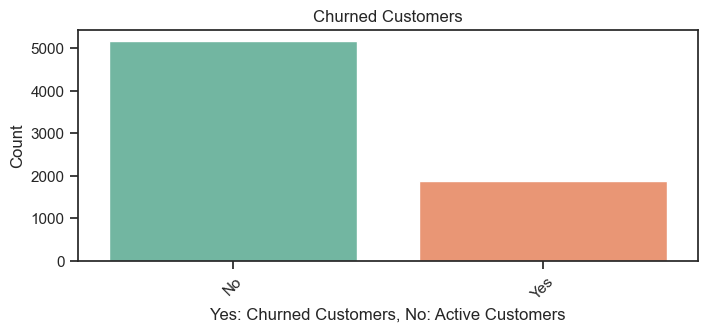

In [176]:
sea.set(style="ticks")
mat.figure(figsize=(8, 3))  # Adjust the figure size as needed
sea.countplot(data=df, x='Churn', palette='Set2')  # Use your preferred color palette

# Set plot labels and title
mat.xlabel('Yes: Churned Customers, No: Active Customers')
mat.ylabel('Count')
mat.title('Churned Customers')

# Rotate x-axis labels for better readability if needed
mat.xticks(rotation=45)

# Show the plot
mat.show()

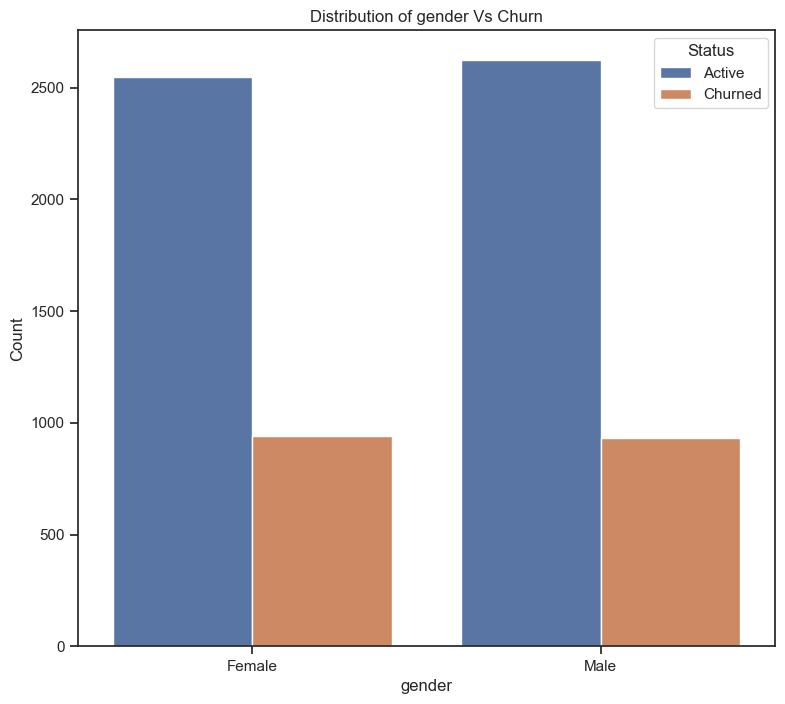

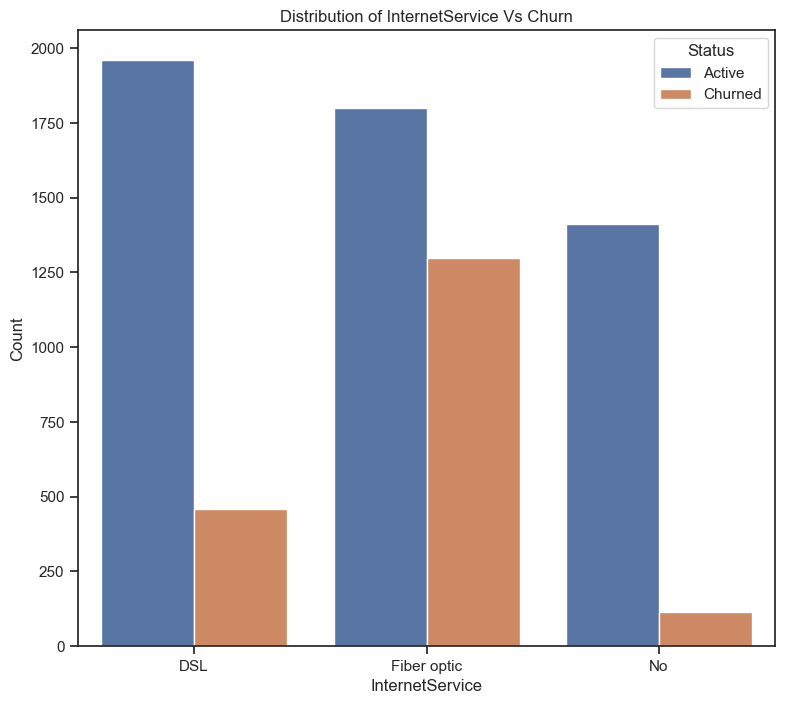

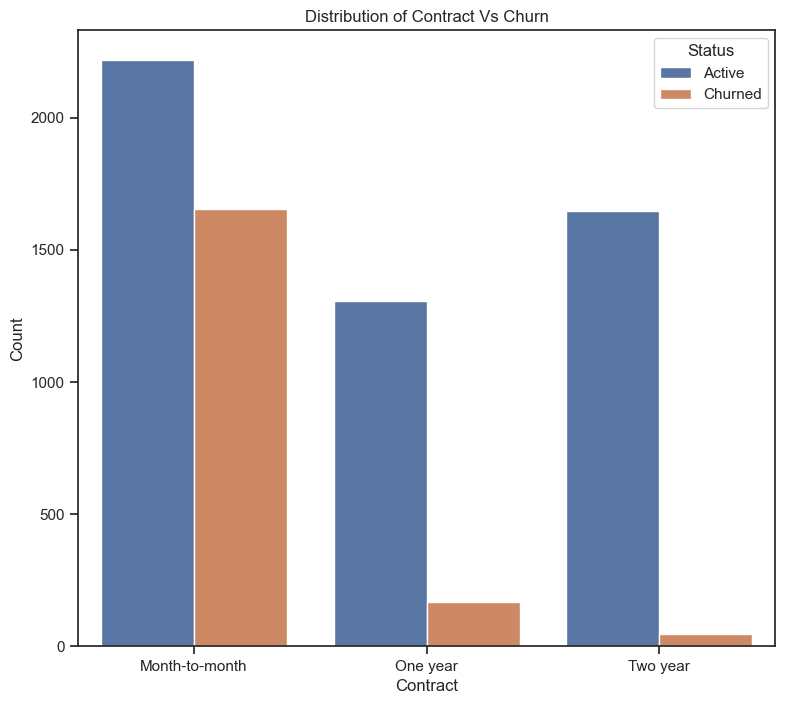

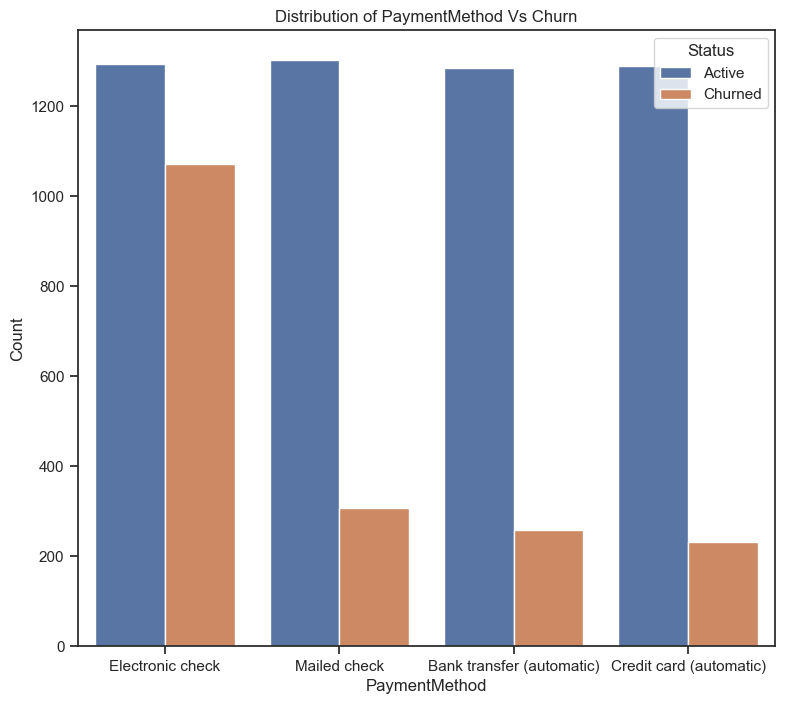

In [177]:
categorical_features_1 = ['gender','InternetService','Contract','PaymentMethod']

for column in categorical_features_1:
    mat.figure(figsize=(9, 8))
    sea.countplot(data=df, x=column, hue='Churn')
    mat.title(f'Distribution of {column} Vs Churn')
    mat.xlabel(column)
    mat.ylabel('Count')
    mat.legend(title='Status', loc='upper right', labels=['Active', 'Churned'])
    mat.show()

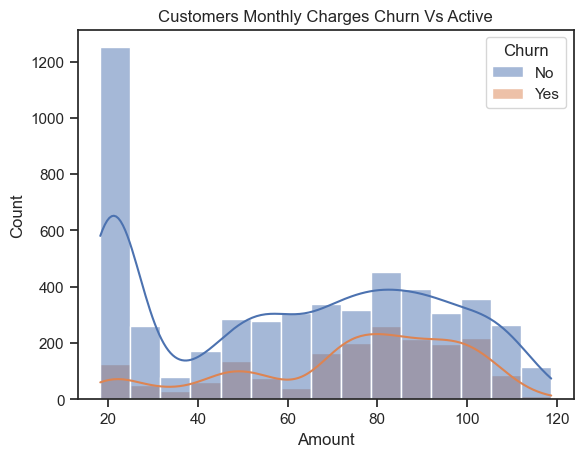

In [178]:
sea.histplot(data=df, x='MonthlyCharges', bins=15, kde=True, color='blue', hue='Churn')

# Set plot labels and title
mat.xlabel('Amount')
mat.ylabel('Count')
mat.title('Customers Monthly Charges Churn Vs Active')

# Show the plot
mat.show()

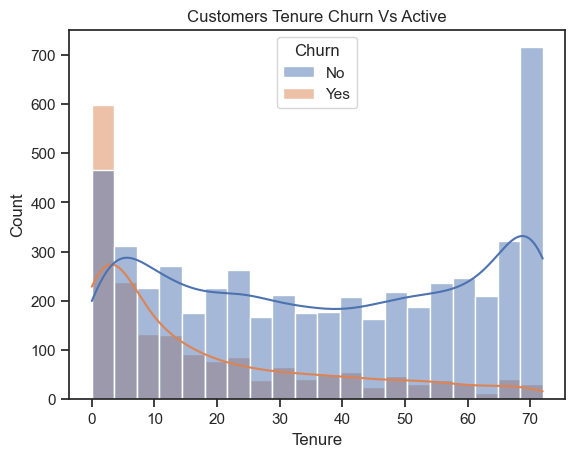

In [295]:
sea.histplot(data=df, x='tenure', bins=20, kde=True, color='blue', hue='Churn')

# Set plot labels and title
mat.xlabel('Tenure')
mat.ylabel('Count')
mat.title('Customers Tenure Churn Vs Active')

# Show the plot
mat.show()

<Axes: >

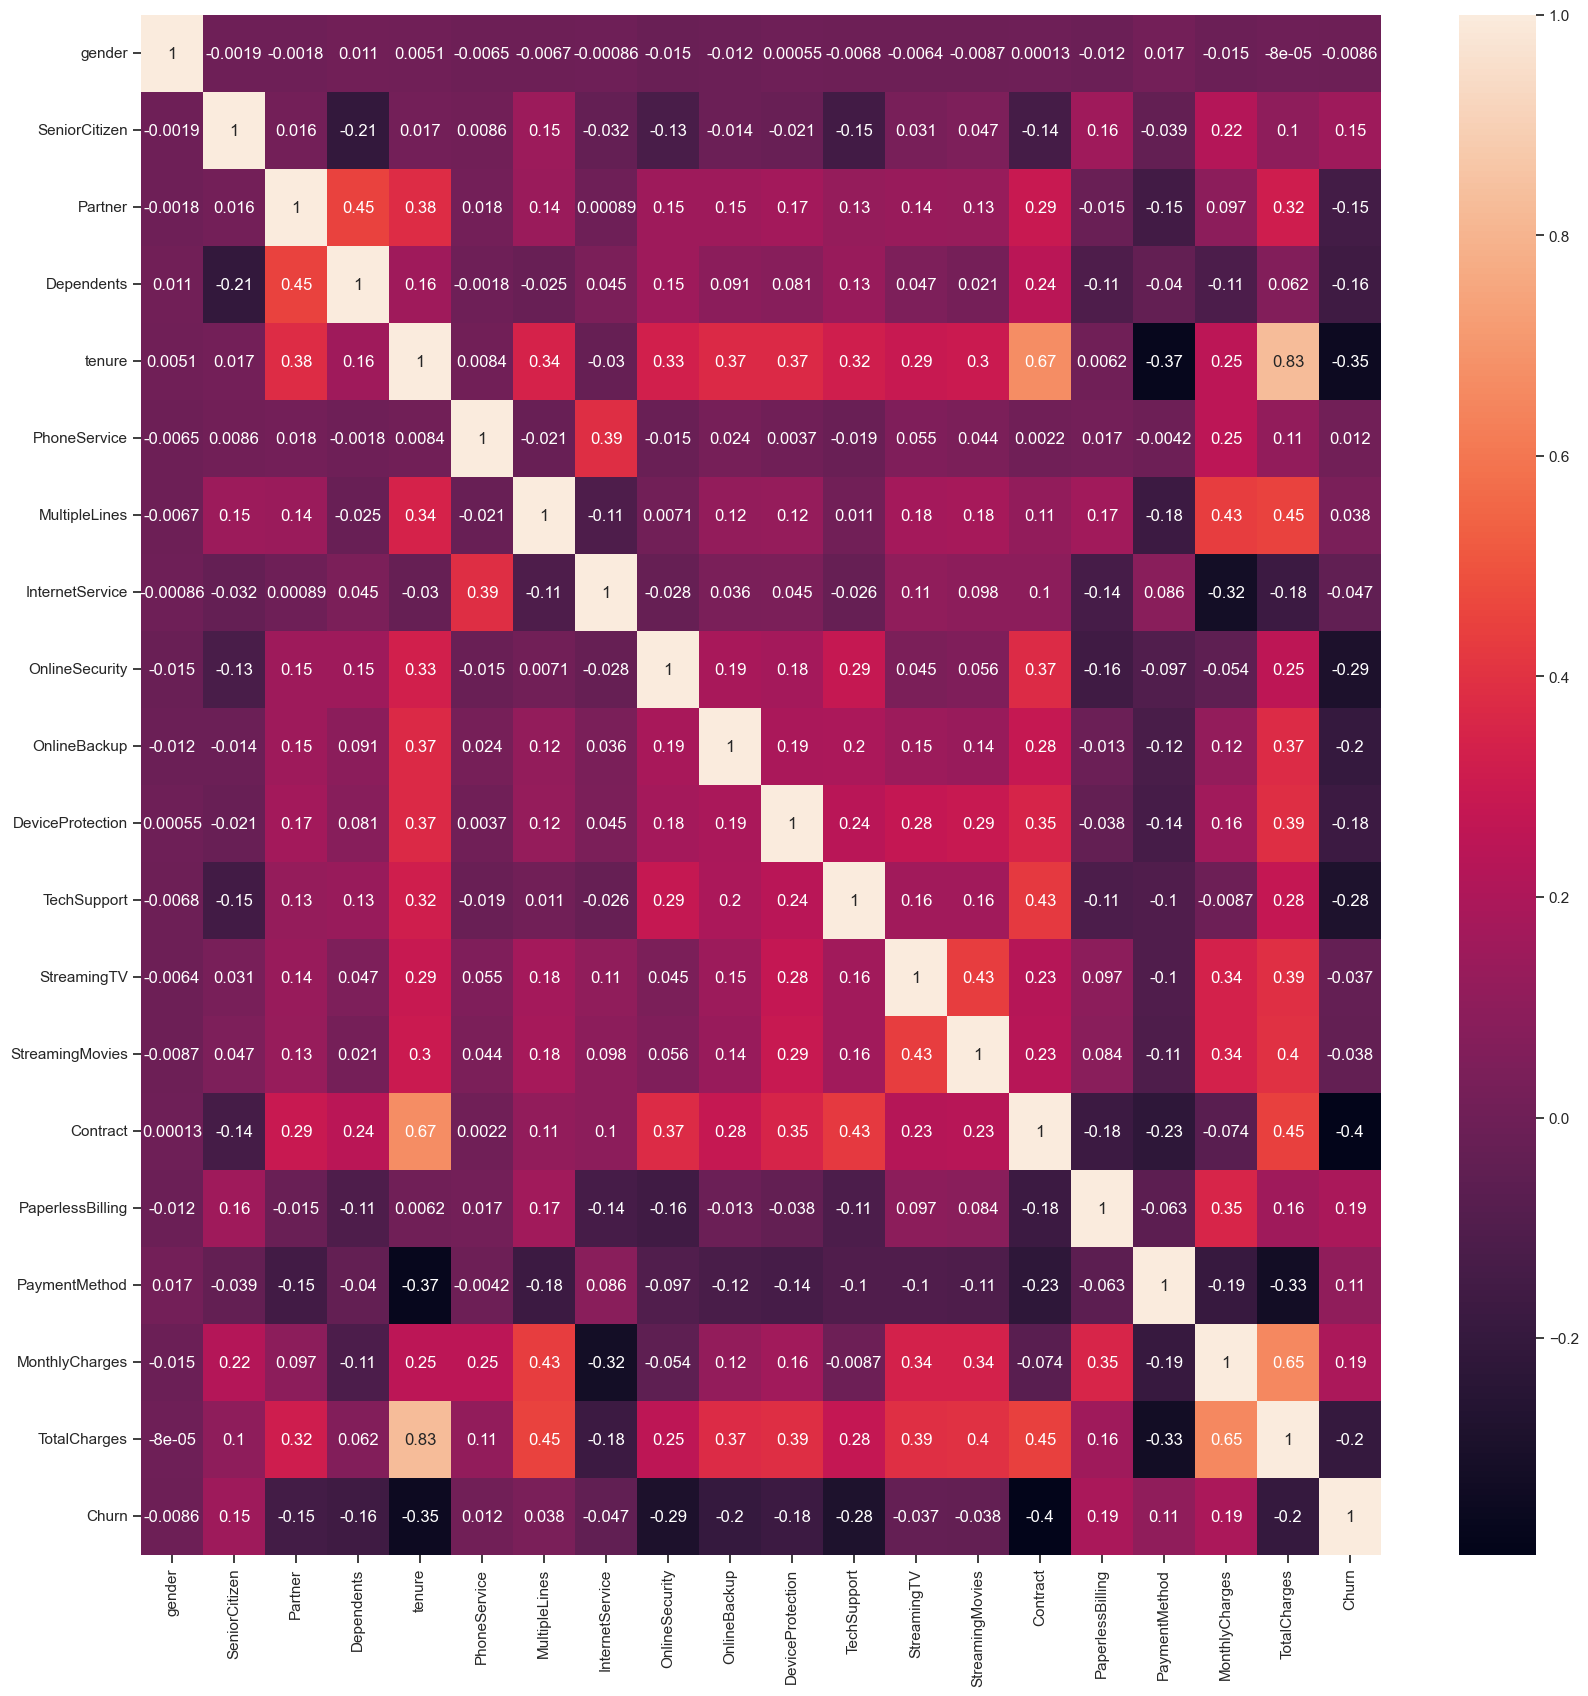

In [299]:
mat.figure(figsize=(20,20))
sea.heatmap(df.corr(), annot=True)

In [304]:
Min_Max = MinMaxScaler()

df['MonthlyCharges'] = Min_Max.fit_transform(df['MonthlyCharges'].values.reshape(-1,1))
df['TotalCharges']= Min_Max.fit_transform(df['TotalCharges'].values.reshape(-1,1))
df['tenure']= Min_Max.fit_transform(df['tenure'].values.reshape(-1,1))

In [305]:
#define the training and learning model
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], test_size=0.2, random_state=42)

In [307]:
from sklearn.model_selection import GridSearchCV

#Decision_Tree_Classifier
dtree  = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [308]:
#Decision Tree Classifier accuracy
dtree  = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=10, random_state=42)

#Fitting the data
dtree.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', dtree.score(X_train, y_train))

#Predicting the values
d_pred = dtree.predict(X_test)

Training Accuracy:  0.8077742279020235


In [310]:
from sklearn.model_selection import GridSearchCV

#Random_forest_clasifier
rfc = RandomForestClassifier()
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Random Forest Classifier
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 42}


In [311]:
#Random Forest Classifier accuracy
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=42)

#Fitting the data
rfc.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))

#Predicting the values
r_pred = rfc.predict(X_test)

Training Accuracy:  0.8313809016684416


In [312]:
from sklearn.model_selection import GridSearchCV

#K Nearst Classifier
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [2,4,6,8,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

#Grid Search Object with KNN Classifier
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'algorithm': 'kd_tree', 'n_neighbors': 10, 'weights': 'uniform'}


In [313]:
#KNN Classifier Acurracy 
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='uniform')

#Fitting the data
knn.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', knn.score(X_train, y_train))

#Predicting the values
k_pred = knn.predict(X_test)

Training Accuracy:  0.8249911253106141


Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

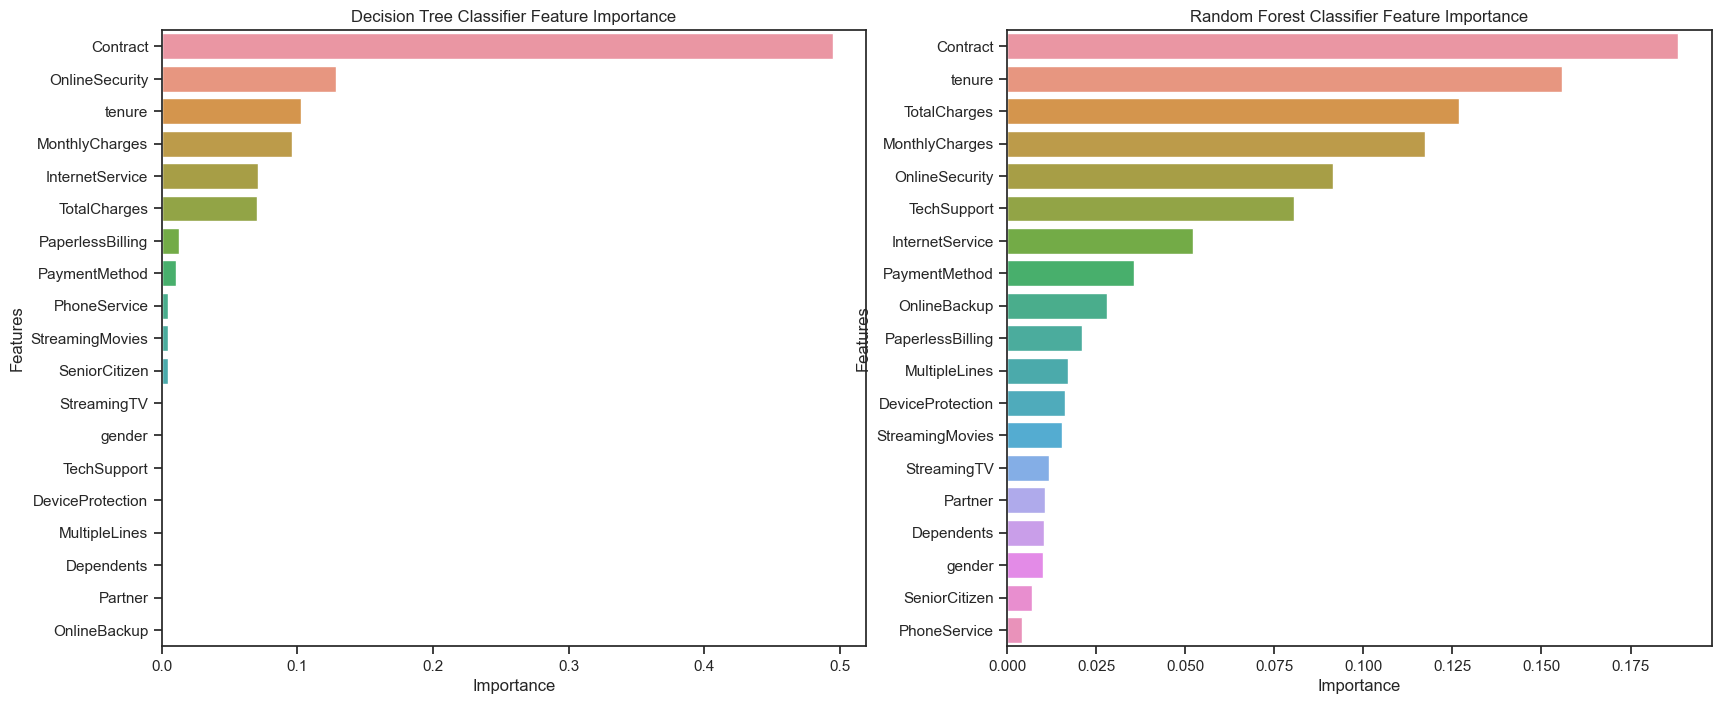

In [319]:
fig, ax = mat.subplots(1, 2, figsize=(20, 8))
# Decision Tree Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sea.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[0]).set_title('Decision Tree Classifier Feature Importance')

# Random Forest Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sea.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[1]).set_title('Random Forest Classifier Feature Importance')
